In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()

In [46]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [81]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
y = df.target
y.head()


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3)

In [84]:
len(x_train)

105

In [85]:
len(x_test)

45

In [86]:
from sklearn.svm import SVC
model = SVC()

In [87]:
model.fit(x_train,y_train)

SVC()

In [88]:
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(x_test)
cm = confusion_matrix(y_test, y_prediction)
cm

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 10]], dtype=int64)

Text(33.22222222222222, 0.5, 'truth')

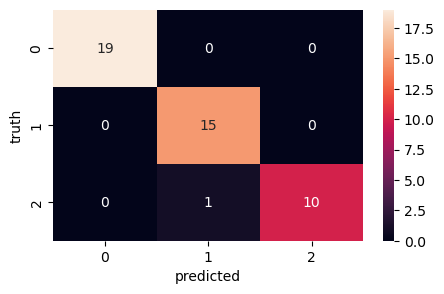

In [89]:
%matplotlib inline
plt.figure(figsize = (5,3))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [92]:
#precision : TP/(TP+FP)
15/17

0.8823529411764706

In [93]:
#recall : TP/(TP+FN)
15/15

1.0